In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Boston Dataset 

### Dataset loading

In [2]:
#http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn import datasets

boston = datasets.load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Dataframe transform  

In [3]:
from pandas import DataFrame

boston_frame = DataFrame(boston.data)
boston_frame.columns = boston.feature_names
boston_frame['target'] = boston.target
boston_frame.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Feature plots

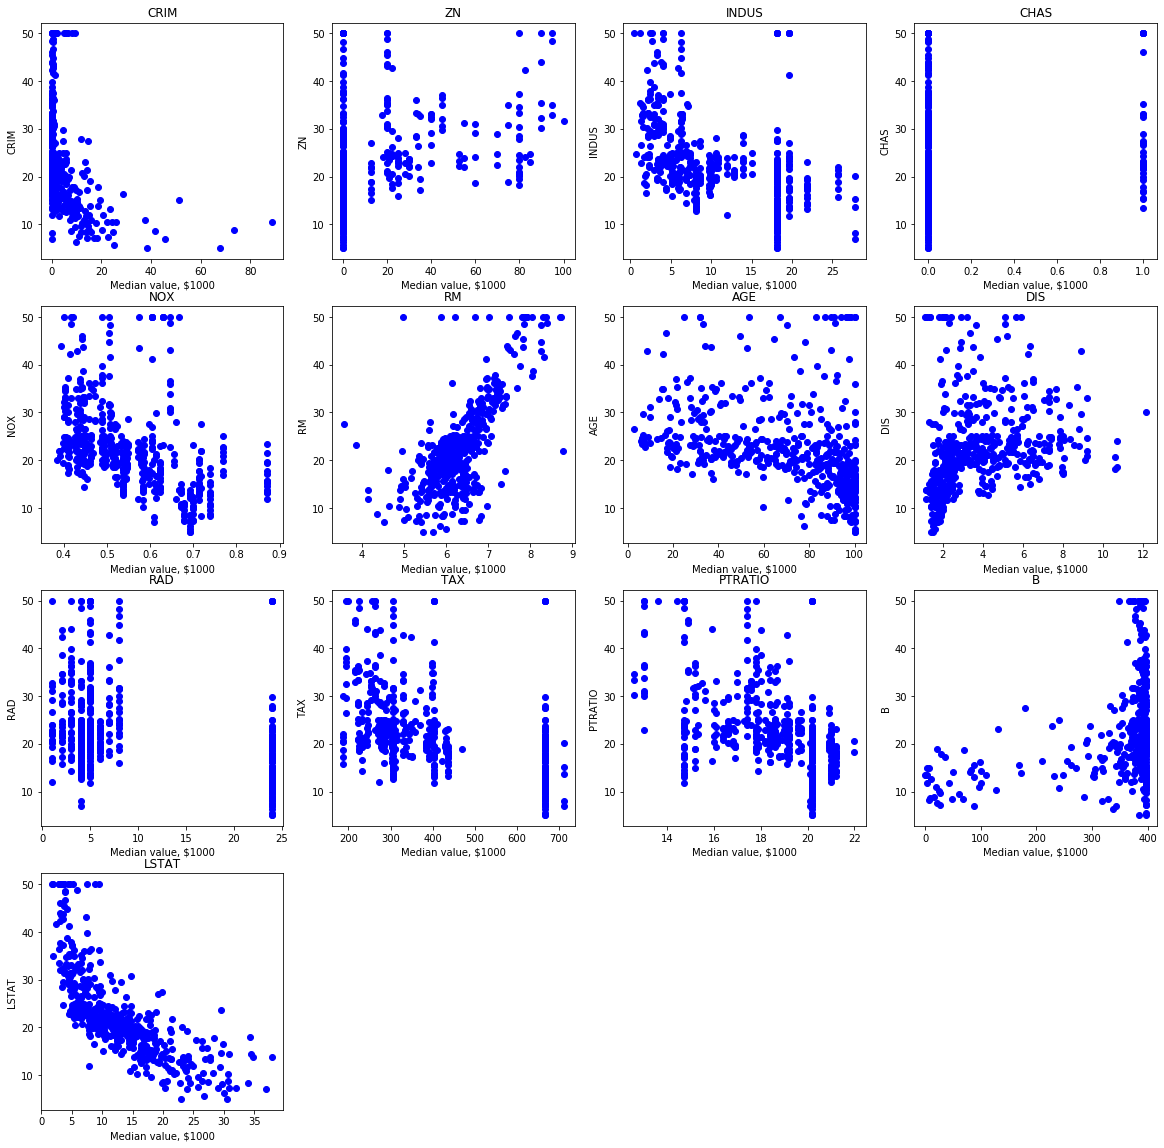

In [4]:
pyplot.figure(figsize(20, 20))

plot_number = 0

for feature_name in boston.feature_names:
    pyplot.subplot(4, 4, plot_number + 1)
    pyplot.scatter(list(map(lambda x : x[plot_number], boston.data)), boston.target, color = 'b')
    pyplot.title(feature_name)
    pyplot.xlabel('Median value, $1000')
    pyplot.ylabel(feature_name)
    plot_number += 1

### Linear regression model learning

In [5]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(boston.data, boston.target)
boston_predictions = linear_regressor.predict(boston.data)


### Basic estimators

In [6]:
from sklearn import metrics

mea = metrics.mean_absolute_error(boston.target, boston_predictions)
print ('MAE = ', mea)
msa = metrics.mean_squared_error(boston.target, boston_predictions)
print ('MSE = ', msa)


MAE =  3.2708628109003137
MSE =  21.894831181729202


### Error plotting

Text(0, 0.5, 'target')

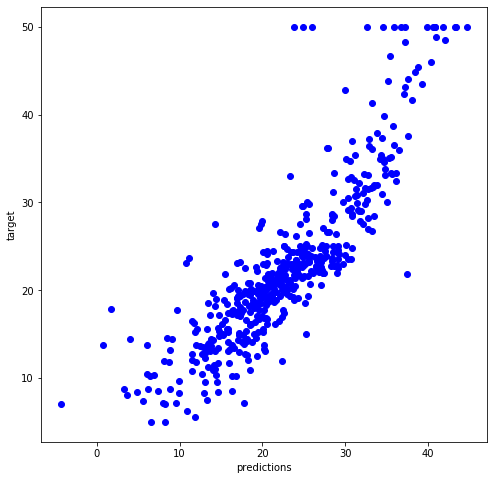

In [7]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(boston_predictions, boston.target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')


### Linear regression function

In [8]:
print ("Model")
print ("y = {:.3f}*x1 + {:.3f}*x2 + ... + {:.3f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))


Model
y = -0.108*x1 + 0.046*x2 + ... + 36.459


# Generated dataset

### Generate dataset

In [9]:
rnd_noise=random.randint(1,20)
my_n = 34 #мой номер в списке 
print("noise, rand = ",rnd_noise)

noise, rand =  7


In [10]:
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
data, target, coef = datasets.make_regression(n_samples=my_n*10, n_features = my_n, n_informative = math.ceil(my_n * 0.2), n_targets = 1, 
                                              noise = rnd_noise, coef = True, random_state = 2)  

### Plot data

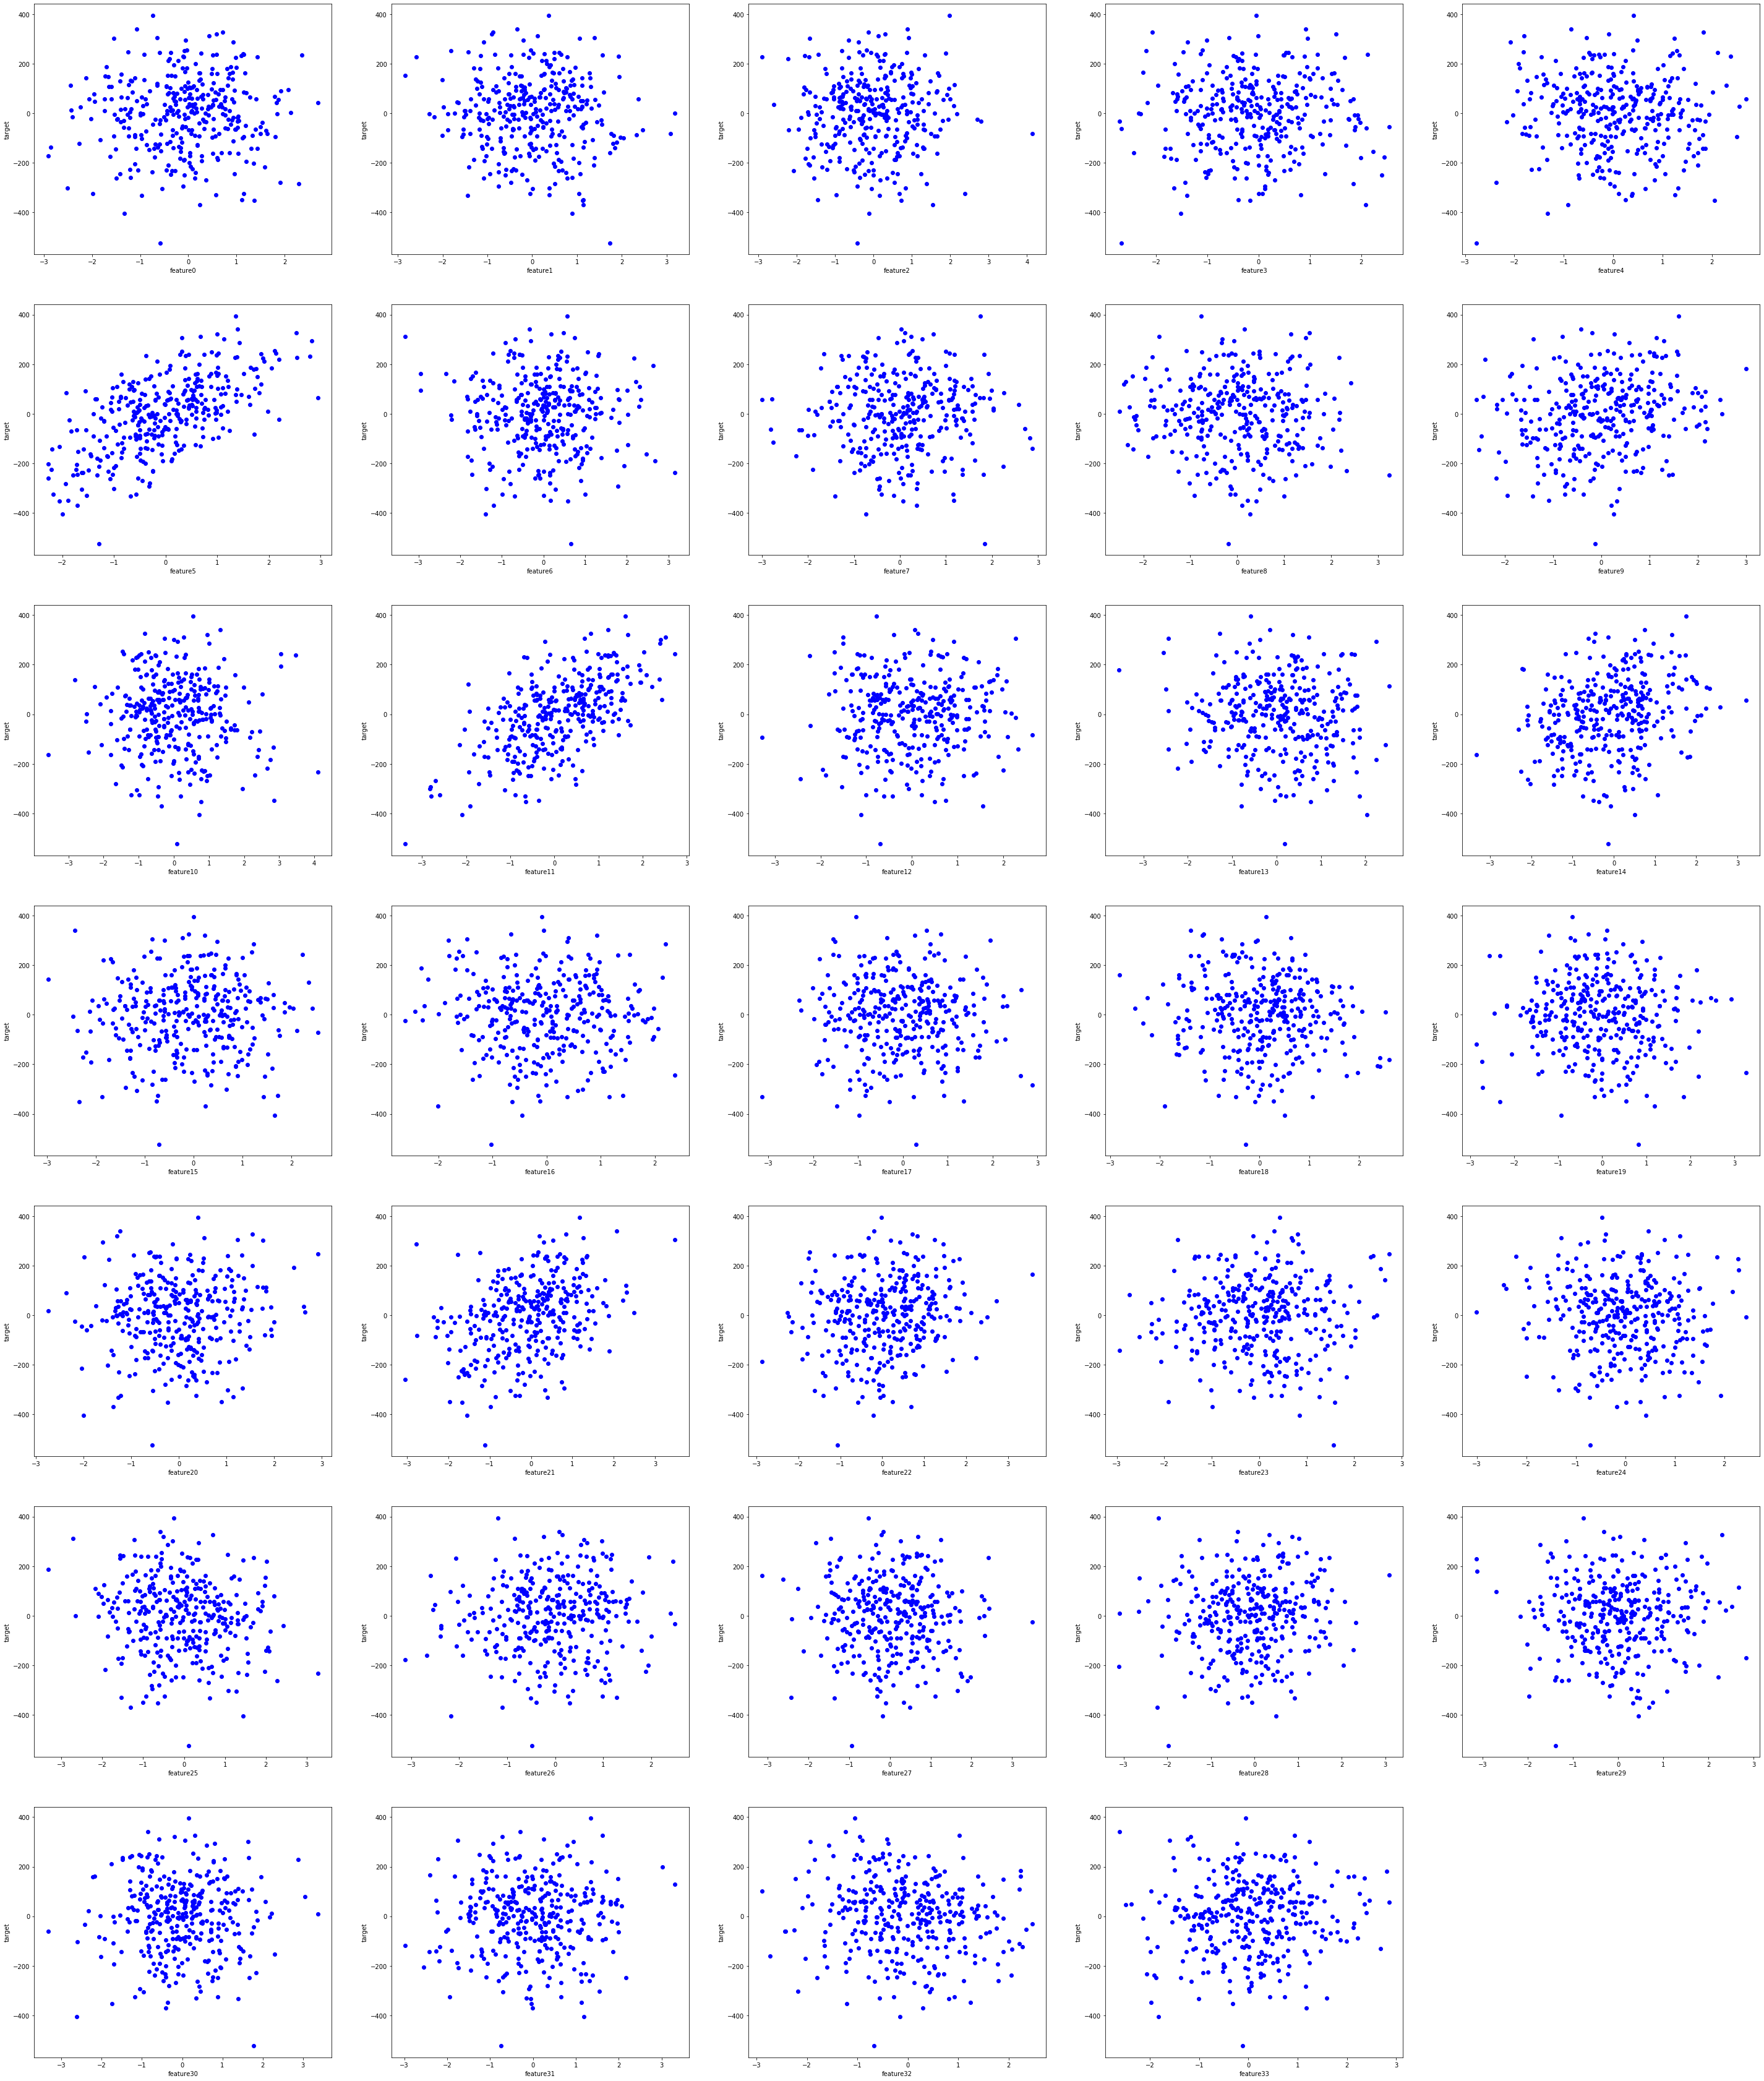

In [11]:
pyplot.figure(figsize(50,70))

for i in range(my_n):
    pyplot.subplot(8,5, i + 1)
    pyplot.scatter(list(map(lambda x : x[i], data)), target, color = 'b')
    pyplot.xlabel('feature'+ str(i))
    pyplot.ylabel('target')

### Learn linear regression model and get predictions

In [12]:
regression_model = linear_model.LinearRegression()
regression_model.fit(data, target)
predictions = regression_model.predict(data)

### Print linear regression coefficients

In [13]:
print ("Model coefficients")
print ('x0 = ', regression_model.intercept_)
print ('x1, x2 = ', regression_model.coef_)
print("\ncoefficients count = ",len(regression_model.coef_))

Model coefficients
x0 =  -0.07250811205862595
x1, x2 =  [ 2.97651495e-01  5.88850242e-01  2.29828454e-02  1.89022051e-02
 -2.12461719e-01  8.66783537e+01 -7.48342805e-02 -4.79050236e-01
  3.60747690e-01  3.61478912e+01 -6.77616590e-01  8.56463284e+01
  3.47717857e-01 -3.63523694e-01  3.21597187e+01 -1.85825799e-01
  1.47813994e-01 -3.04070768e-01 -6.34056185e-03 -7.05418644e-01
  8.41488949e-01  5.11889952e+01  2.50974086e+01  9.14333214e-01
  1.00850464e-01  1.07198101e-01 -2.95223700e-01 -7.23626716e-02
  1.44557417e+01  5.41950493e-01  1.13653643e+00 -1.60343849e-01
 -3.07124798e-01 -5.01026979e-01]

coefficients count =  34


### Plot predictions

Text(0, 0.5, 'target')

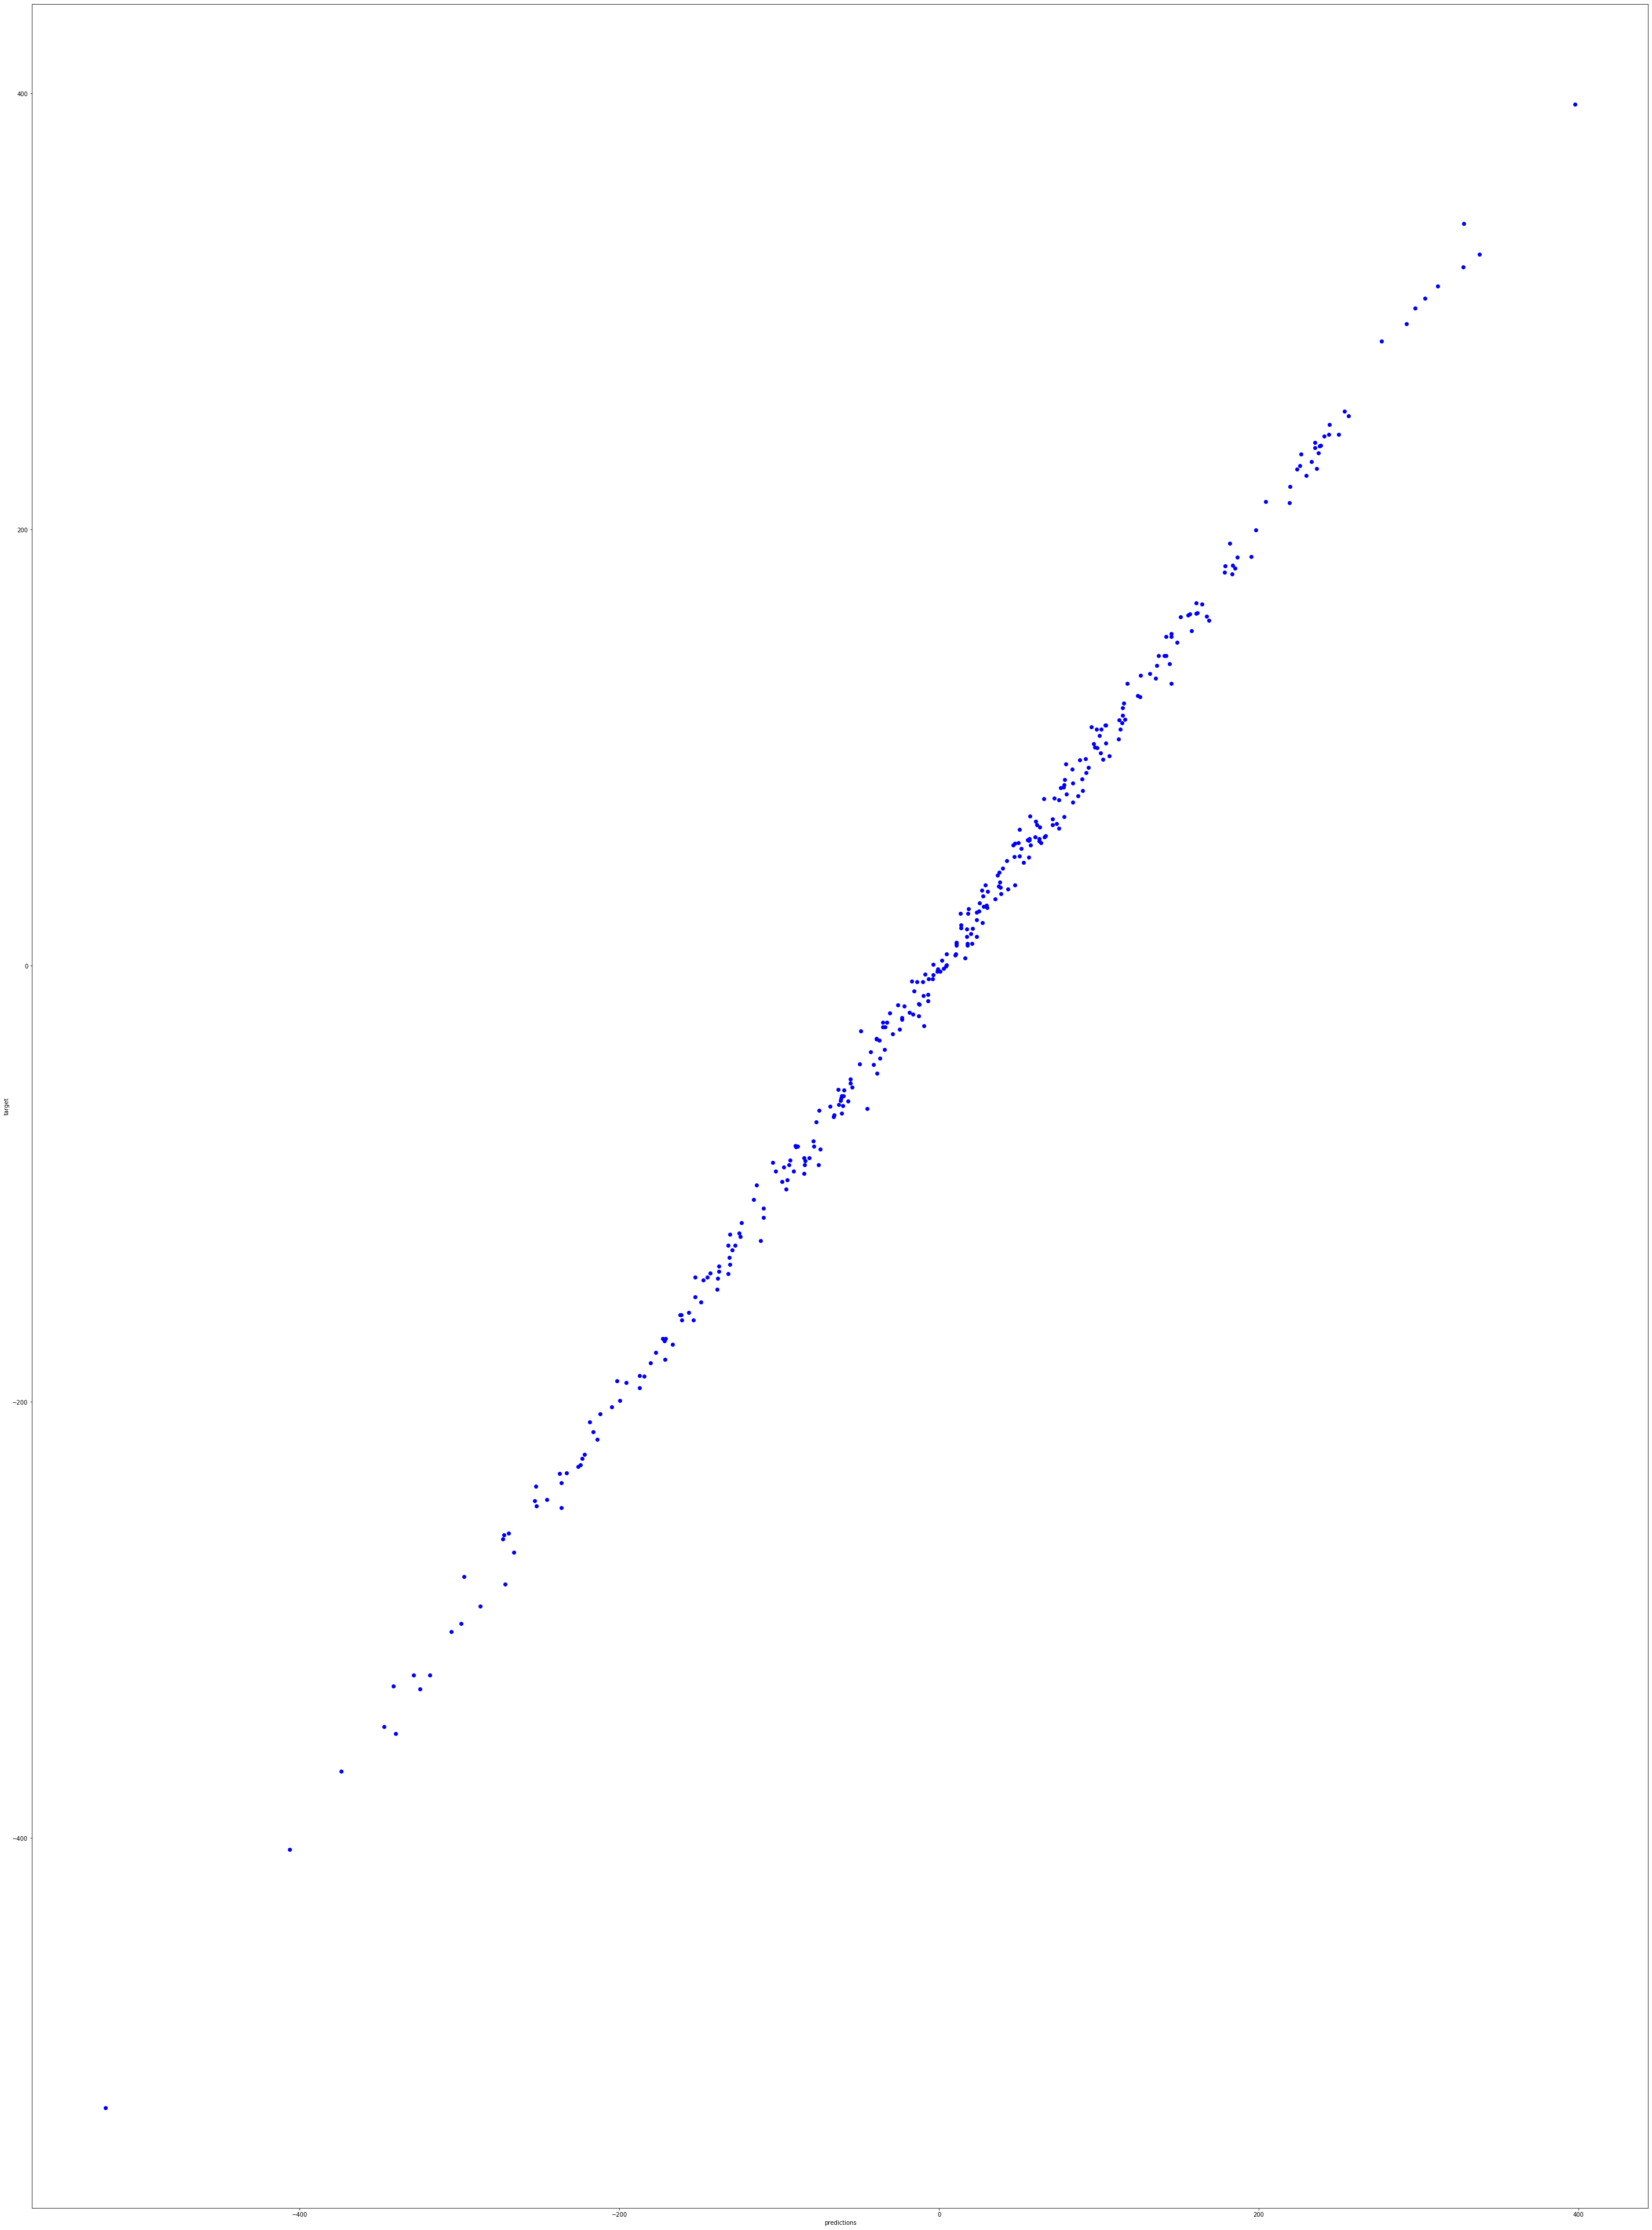

In [14]:
pyplot.scatter(predictions, target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')

### Print learned and true regression models

In [20]:
model_1 = "y = ";

for i in range(1, my_n+1):
    model_1+="{:.3f}*x"+ str(i)
    if i != my_n :
        model_1+= " + "
model_2 = model_1        
model_1 += " + {:.3f}\n"

print(model_1, model_2)

y = {:.3f}*x1 + {:.3f}*x2 + {:.3f}*x3 + {:.3f}*x4 + {:.3f}*x5 + {:.3f}*x6 + {:.3f}*x7 + {:.3f}*x8 + {:.3f}*x9 + {:.3f}*x10 + {:.3f}*x11 + {:.3f}*x12 + {:.3f}*x13 + {:.3f}*x14 + {:.3f}*x15 + {:.3f}*x16 + {:.3f}*x17 + {:.3f}*x18 + {:.3f}*x19 + {:.3f}*x20 + {:.3f}*x21 + {:.3f}*x22 + {:.3f}*x23 + {:.3f}*x24 + {:.3f}*x25 + {:.3f}*x26 + {:.3f}*x27 + {:.3f}*x28 + {:.3f}*x29 + {:.3f}*x30 + {:.3f}*x31 + {:.3f}*x32 + {:.3f}*x33 + {:.3f}*x34 + {:.3f}
 y = {:.3f}*x1 + {:.3f}*x2 + {:.3f}*x3 + {:.3f}*x4 + {:.3f}*x5 + {:.3f}*x6 + {:.3f}*x7 + {:.3f}*x8 + {:.3f}*x9 + {:.3f}*x10 + {:.3f}*x11 + {:.3f}*x12 + {:.3f}*x13 + {:.3f}*x14 + {:.3f}*x15 + {:.3f}*x16 + {:.3f}*x17 + {:.3f}*x18 + {:.3f}*x19 + {:.3f}*x20 + {:.3f}*x21 + {:.3f}*x22 + {:.3f}*x23 + {:.3f}*x24 + {:.3f}*x25 + {:.3f}*x26 + {:.3f}*x27 + {:.3f}*x28 + {:.3f}*x29 + {:.3f}*x30 + {:.3f}*x31 + {:.3f}*x32 + {:.3f}*x33 + {:.3f}*x34


In [29]:
print ("Learned regression model")
print (model_1.format(regression_model.coef_[0], 
                      regression_model.coef_[1], 
                      regression_model.coef_[2], 
                      regression_model.coef_[3], 
                      regression_model.coef_[4], 
                      regression_model.coef_[5], 
                      regression_model.coef_[6], 
                      regression_model.coef_[7], 
                      regression_model.coef_[8], 
                      regression_model.coef_[9], 
                      regression_model.coef_[10], 
                      regression_model.coef_[11], 
                      regression_model.coef_[12], 
                      regression_model.coef_[13], 
                      regression_model.coef_[14], 
                      regression_model.coef_[15], 
                      regression_model.coef_[16], 
                      regression_model.coef_[17], 
                      regression_model.coef_[18], 
                      regression_model.coef_[19], 
                      regression_model.coef_[20], 
                      regression_model.coef_[21], 
                      regression_model.coef_[22], 
                      regression_model.coef_[23], 
                      regression_model.coef_[24], 
                      regression_model.coef_[25], 
                      regression_model.coef_[26], 
                      regression_model.coef_[27], 
                      regression_model.coef_[28], 
                      regression_model.coef_[29], 
                      regression_model.coef_[30], 
                      regression_model.coef_[31],
                      regression_model.coef_[32], 
                      regression_model.coef_[33], 
                                                  regression_model.intercept_))
print ("True regression model")
print (model_2.format(coef[0],coef[1],coef[2],coef[3],coef[4],coef[5],coef[6],
                     coef[7],coef[8],coef[9],coef[10],coef[11],coef[12],coef[13],
                     coef[14],coef[15],coef[16],coef[17],coef[18],coef[19],coef[20],
                     coef[21],coef[22],coef[23],coef[24],coef[25],coef[26],coef[27],
                     coef[28],coef[29],coef[30],coef[31],coef[32],coef[33]))

Learned regression model
y = 0.298*x1 + 0.589*x2 + 0.023*x3 + 0.019*x4 + -0.212*x5 + 86.678*x6 + -0.075*x7 + -0.479*x8 + 0.361*x9 + 36.148*x10 + -0.678*x11 + 85.646*x12 + 0.348*x13 + -0.364*x14 + 32.160*x15 + -0.186*x16 + 0.148*x17 + -0.304*x18 + -0.006*x19 + -0.705*x20 + 0.841*x21 + 51.189*x22 + 25.097*x23 + 0.914*x24 + 0.101*x25 + 0.107*x26 + -0.295*x27 + -0.072*x28 + 14.456*x29 + 0.542*x30 + 1.137*x31 + -0.160*x32 + -0.307*x33 + -0.501*x34 + -0.073

True regression model
y = 0.000*x1 + 0.000*x2 + 0.000*x3 + 0.000*x4 + 0.000*x5 + 86.855*x6 + 0.000*x7 + 0.000*x8 + 0.000*x9 + 35.843*x10 + 0.000*x11 + 86.104*x12 + 0.000*x13 + 0.000*x14 + 32.293*x15 + 0.000*x16 + 0.000*x17 + 0.000*x18 + 0.000*x19 + 0.000*x20 + 0.000*x21 + 51.249*x22 + 26.001*x23 + 0.000*x24 + 0.000*x25 + 0.000*x26 + 0.000*x27 + 0.000*x28 + 15.121*x29 + 0.000*x30 + 0.000*x31 + 0.000*x32 + 0.000*x33 + 0.000*x34


### Print evaluation metrics

In [30]:
mae = metrics.mean_absolute_error(target, predictions)
print ('MAE = ', mae)
mse = metrics.mean_squared_error(target, predictions)
print ('MSE = ', mse)

MAE =  5.027054365391541
MSE =  39.82785212923447
